In [12]:
from keras.layers import Input,Lambda,Flatten,Dense
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [13]:
IMAGE_SIZE=[224,224]

train_path="cnn\cancer\train"
test_path="cnn\cancer\test"

In [14]:
vgg = VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

for layer in vgg.layers:
    layer.trainable=False

In [15]:
    
folder = glob(r'C:\Users\ritik\deep learning\cnn\cancer\train\*')
print(len(folder))

2


In [16]:
x=Flatten()(vgg.output)

prediction =Dense(len(folder),activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

model.summary()

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=.2,
                                   zoom_range=.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


training_set = train_datagen.flow_from_directory(r"C:\Users\ritik\deep learning\cnn\cancer\train",
                                                 target_size=(224,224),
                                                 batch_size= 32,
                                                 class_mode='categorical')

test_set= test_datagen.flow_from_directory(r"C:\Users\ritik\deep learning\cnn\cancer\test",
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='categorical')

r= model.fit(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
    )

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

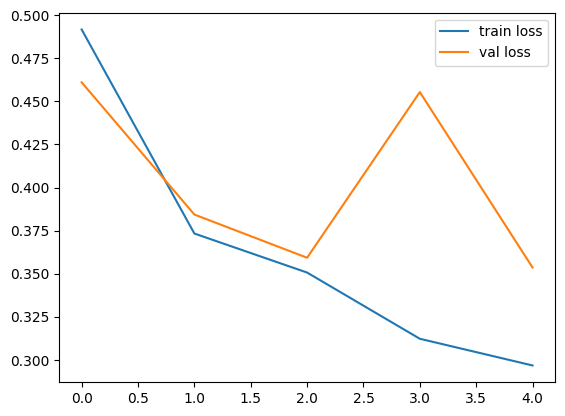

<Figure size 640x480 with 0 Axes>

In [17]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


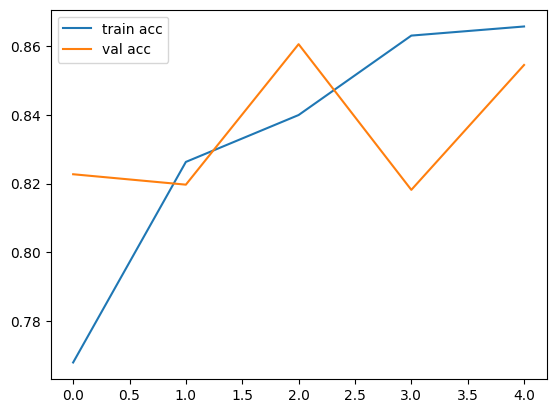

<Figure size 640x480 with 0 Axes>

In [20]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

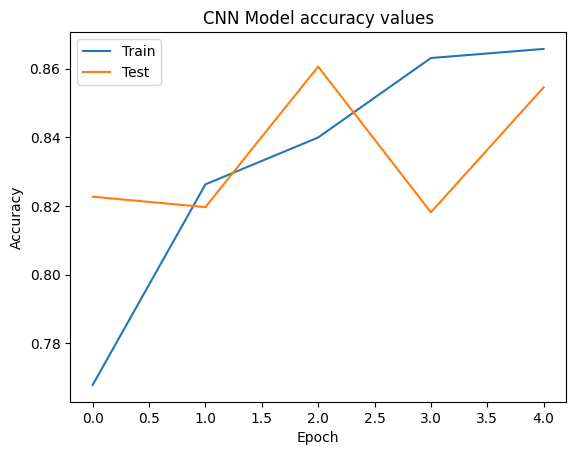

In [22]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
